Basics of machine learning. Terms and terminologies

Objectives: Prediction
Difference between BI and AI

To predict outcome: we use Data.
The part of data we want to predict is called the Target Variables.
The data that forms part of the equation that will ultimately predict the Target are called Features or Variables.
The equation itself is called the model.

Data Vs Feature Set
Not all data is feature

Two types of Variables
1. Categorical
2. Continuous

Event within categorical there can be ordinal or cardinal

The stages of machine learning process
1. Look at the data
2. Explore the data - Also called the Exploratory Data Analysis
3. Feature Engineering - Create a feature set
4. apply machine learning


In [1]:
#loans data

import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib as plt

loansfile = 'C:\Training\socgen_python_ml\datasets\loans\loans_csv.csv'



In [2]:
df = pd.read_csv(loansfile)
df.head()


C:\Users\sanya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0  38098114.0  40860827.0    15000.0      15000.0          15000.0   
1  36805548.0  39558264.0    10400.0      10400.0          10400.0   
2  37822187.0  40585251.0     9600.0       9600.0           9600.0   
3  37612354.0  40375473.0    12800.0      12800.0          12800.0   
4  37842129.0  40605224.0    21425.0      21425.0          21425.0   

         term  int_rate  installment grade sub_grade ...  emp_length  \
0   60 months     12.39       336.64     C        C1 ...   10+ years   
1   36 months      6.99       321.08     A   Unknown ...     8 years   
2   36 months     13.66       326.53     C   Unknown ...   10+ years   
3   60 months     17.14       319.08     D   Unknown ...   10+ years   
4   60 months     15.59       516.36     D        D1 ...     6 years   

  home_ownership annual_inc  verification_status     issue_d loan_status  \
0           RENT    78000.0      Source Verified  01-12-2014     Current   
1       MORTGAGE    58000.0         Not Verified  01-12-2014     Current   
2           RENT    69000.0      Source Verified  01-12-2014  Fully Paid   
3       MORTGAGE   125000.0             Verified  01-12-2014     Current   
4           RENT    63800.0      Source Verified  01-12-2014     Current   

              purpose                    title addr_state desc  
0  debt_consolidation       Debt consolidation         VA  NaN  
1         credit_card  Credit card refinancing         CA  NaN  
2  debt_consolidation       Debt consolidation         NJ  NaN  
3                 car            Car financing         CA  NaN  
4         credit_card  Credit card refinancing         MO  NaN  

[5 rows x 21 columns]

In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'desc'],
      dtype='object')

In [4]:
df.describe()

id     member_id      loan_amnt    funded_amnt  \
count  6.567220e+05  6.567220e+05  656725.000000  656722.000000   
mean   4.240963e+07  4.554868e+07   15107.482519   15107.473710   
std    1.790163e+07  1.879242e+07    8525.713798    8525.680161   
min    5.670500e+04  7.082500e+04    1000.000000    1000.000000   
25%    2.762048e+07  3.010536e+07    8450.000000    8450.000000   
50%    4.434969e+07  4.738772e+07   13750.000000   13750.000000   
75%    5.855362e+07  6.239410e+07   20000.000000   20000.000000   
max    6.861706e+07  7.354484e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  
count    656722.000000  656722.000000  656722.000000  6.567220e+05  
mean      15101.813058      13.021346     442.091265  7.620809e+04  
std        8522.489763       4.356882     244.926455  6.793082e+04  
min         900.000000       5.320000      23.360000  0.000000e+00  
25%        8450.000000       9.670000     264.460000  4.600000e+04  
50%       13750.000000      12.690000     385.140000  6.500000e+04  
75%       20000.000000      15.610000     578.790000  9.000000e+04  
max       35000.000000      28.990000    1445.460000  9.500000e+06

In [5]:
#feature engineering
#convert text ennumerations to numbers

#dfgrade	sub_grade	...	emp_length	home_ownership


print(df['loan_status'].unique())

['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default' 'Issued' nan]


In [6]:
df['loan_status'].value_counts()



Current               536111
Fully Paid             77697
Charged Off            16754
Late (31-120 days)      9538
Issued                  8460
In Grace Period         5165
Late (16-30 days)       1997
Default                 1000
Name: loan_status, dtype: int64

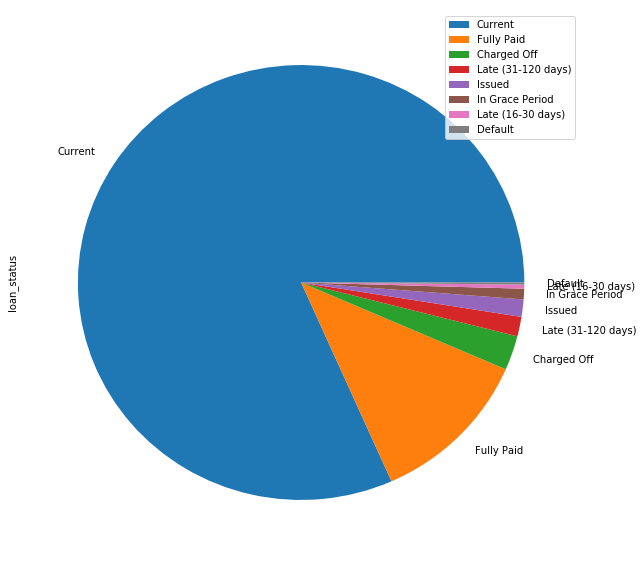

In [15]:
df['loan_status'].value_counts().to_frame().plot.pie(y='loan_status', figsize=(10, 10))

In [8]:
#frequency of each loan status
print(df['purpose'].unique())

['debt_consolidation' 'credit_card' 'car' 'home_improvement' 'house'
 'medical' 'other' 'moving' 'major_purchase' 'vacation' 'small_business'
 'renewable_energy' 'wedding' 'educational' nan]


Some of the Standard Feature Engineering Techniques

1. Adding new variables 
2. Adding ratios
3. Missing value imputation
4. Binning